
<h1 style='background-color: #6495ED; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' >Predicting Life Expectancy Using Linear Regression </h1>
Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

<img src="https://media.licdn.com/dms/image/D4D12AQEVe9gqBelM5Q/article-cover_image-shrink_720_1280/0/1672742379196?e=2147483647&v=beta&t=m8-GsGRllbkFw8PxCnfAlIEkO2OeD8FiZrfIXz0XM90">

<h1 style='background-color:#6495ED ; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' > Exploratory Data Analysis </h1>


In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
# loading data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=10nKWCvHYHkdM_KwretKe5mWq47Lc2I99")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
# EDA Bivariate Analysis

In [5]:
# plt.figure(figsize=(13,17))
# sns.pairplot(df[['Adult Mortality','Life expectancy ',]])
# plt.show()

In [6]:
# plt.figure(figsize=(13,17))
# eating habits, lifestyle, exercise, smoking, drinking alcohol
# sns.pairplot(df[['infant deaths','Life expectancy ',]])
# plt.show()

In [7]:
correlation_matrix = df[['Life expectancy ', 'Alcohol',' HIV/AIDS',' BMI ','Measles ','Hepatitis B','Polio','Diphtheria ']].corr()

<Axes: >

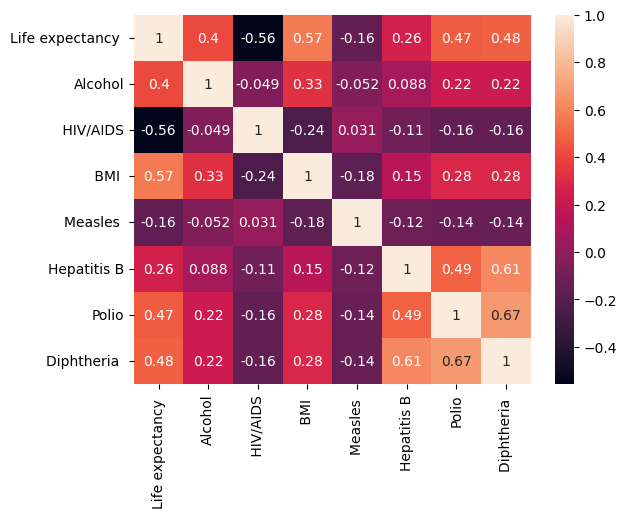

In [8]:
sns.heatmap(correlation_matrix, annot=True)

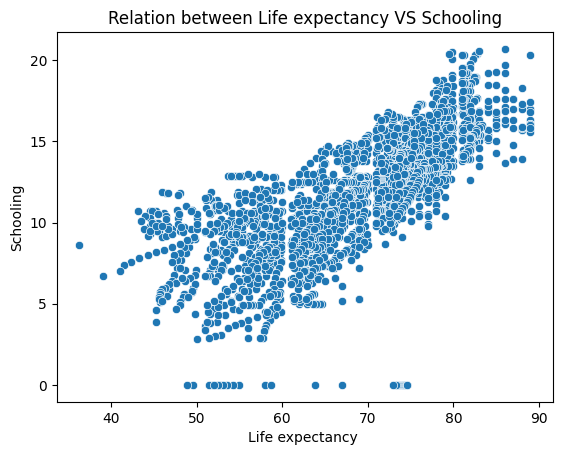

In [9]:
sns.scatterplot(x=df['Life expectancy '], y=df['Schooling'], data=df)
plt.title('Relation between Life expectancy VS Schooling')
plt.show()

<Axes: >

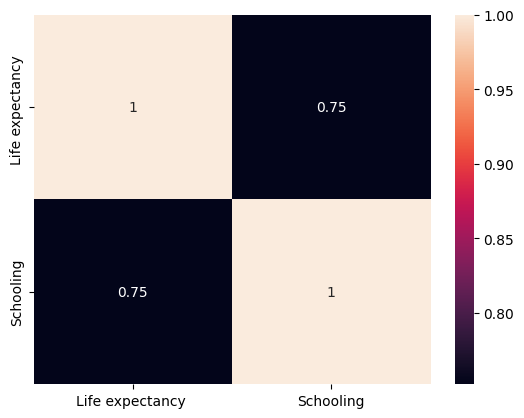

In [10]:
correlation_matrix = df[['Life expectancy ', 'Schooling']].corr()
sns.heatmap(correlation_matrix, annot=True)

<Axes: >

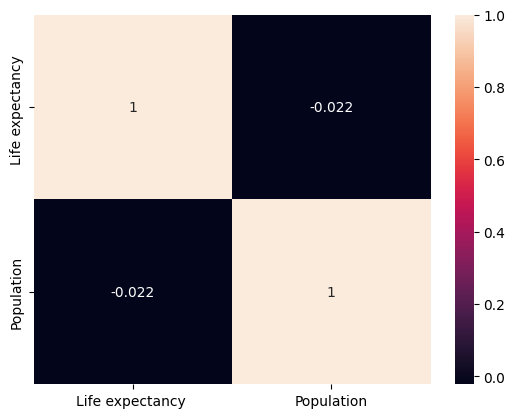

In [11]:
correlation_matrix = df[['Life expectancy ', 'Population']].corr()
sns.heatmap(correlation_matrix, annot=True)

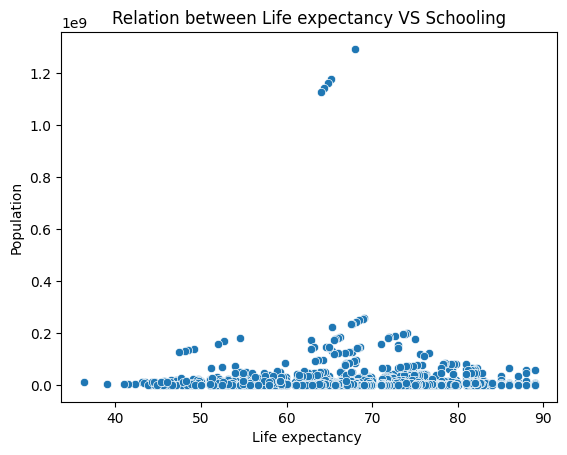

In [12]:
sns.scatterplot(x=df['Life expectancy '], y=df['Population'], data=df)
plt.title('Relation between Life expectancy VS Schooling')
plt.show()

#Exercise 1: EDA

Perform some Exploratory Data analysis and give atleast 4 observations explaining each observations with a Figure. Providing answer to the below questions my help but you are free to come up with something else.
- <l1> How does Infant and Adult mortality rates affect life expectancy?</li>

  - Adult mortality is less for high life expectancy.
  
  - Infant rate is hight for less life expectancy.


- <l1>Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol.</li>

    - Positively correlated with alcohol, negative correlated with HIV, Measeles
  
- <l1>What is the impact of schooling on the lifespan of humans?</li>
    - As schooling is higher Life expectancy is higher
- <l1>Do densely populated countries tend to have lower life expectancy?</li>
    - Yes



#Exercise 2: Data Processing and Model Developement

- Select an appropriate method for dealing with Null values in the data set and briefly coment on your choice

- Select most relevant features for training if need be.

- Split the data into training and testing sets in the ratio 80% : 20% respectively

- Fit a Multilinear Regression and print the mean cross validation score.


In [13]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [14]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [15]:
df['Life expectancy '] = df['Life expectancy '].fillna(df['Life expectancy '].mean())

In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio                    

In [18]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [19]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df.drop(["Country","Year", "Status"],axis=1,inplace=True)

<Axes: >

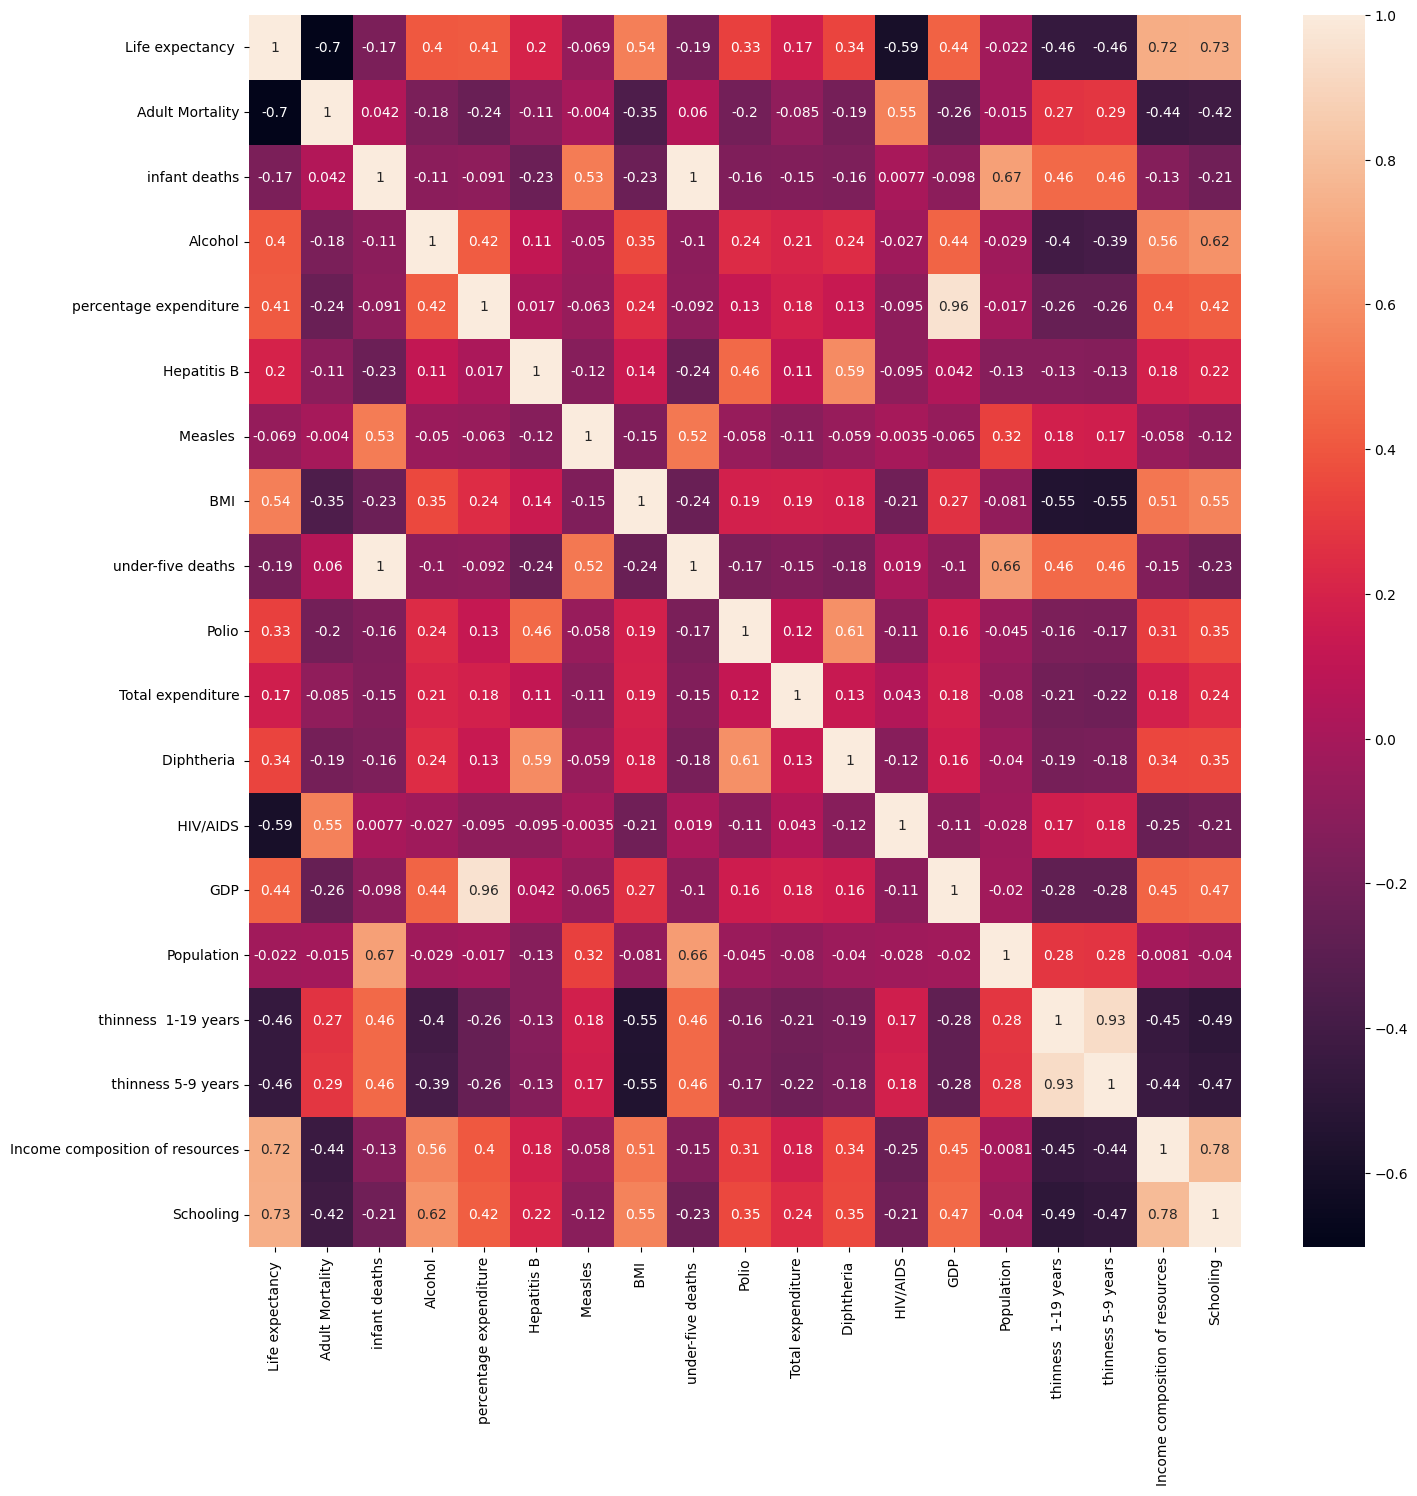

In [21]:
fig = plt.figure(figsize =(16, 16))
sns.heatmap(df.corr(), annot=True)

In [22]:
df.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [23]:
# From correlation matrix we see some positive correlations so we remove columns
df.drop([' thinness  1-19 years','Income composition of resources'],axis=1,inplace=True)

In [24]:
df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 5-9 years,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.3,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,18.0,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.9,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.3,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.7,9.8


In [27]:
y = df['Life expectancy ']
X= df.drop(columns=["Life expectancy "])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error
print(root_mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test, y_pred))

3.8567095855651385
0.7949341495774402
14.874208827390024


In [ ]:
#Exercise 2: Data Processing and Model Developement

- Select an appropriate method for dealing with Null values in the data set and briefly coment on your choice

- Select most relevant features for training if need be.

- Split the data into training and testing sets in the ratio 80% : 20% respectively

- Fit a Multilinear Regression and print the mean cross validation score.
